In [1]:
import numpy as np

In [2]:
from ipywidgets import IntProgress
from IPython.display import display

In [3]:
from cost_calculator_factory import CostCalculatorFactory
from multibinary_converter import MultiBinaryConverter
from multidiscrete_converter import MultiDiscreteConverter
from fitness_calculator import FitnessCalculator

In [4]:
from genetic_multibinary_space_config import GeneticMultiBinarySpaceConfig
from genetic_multidiscrete_space_config import GeneticMultiDiscreteSpaceConfig
from genetic_config import GeneticConfig
from genetic_solver import GeneticSolver

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
l = 1
n = 5
m = 4
k = 3

In [7]:
T = np.array([
    [  1,   0,   0,   0],
    [0.5, 0.5,   0,   0],
    [  0, 0.5, 0.5,   0],
    [  0,   0, 0.5, 0.5],
    [  0,   0,   0,   1]
])

In [8]:
D = np.array([
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

In [9]:
C = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
])

In [10]:
E = np.array([
    [1, 0, 0, 0, 0]
])

In [11]:
def show_result(genetic_solver, cost_calculator_factory, converter):
    best_solution, best_fitness, best_idx, duration = genetic_solver.solve() # ga_instance.best_solution()
    print('Лучшее решение')
    A = converter.convert(best_solution)
    print(A)
    print('Значение функции пригодности', best_fitness)
    cost_calculator = cost_calculator_factory.get_cost_calculator(A)
    cost = cost_calculator.calculate()
    print('Стоимость', cost)
    genetic_solver.plot_fitness()

In [12]:
cost_calculator_factory = CostCalculatorFactory(T, D, C, E)

In [13]:
config = GeneticConfig()

In [14]:
# MultiBinary

In [15]:
multibinary_converter = MultiBinaryConverter(m, k)
multibinary_fitness_calculator = FitnessCalculator(cost_calculator_factory, multibinary_converter)

In [16]:
multibinary_space_config = GeneticMultiBinarySpaceConfig(m, k)

In [17]:
multibinary_progress = IntProgress(min=0, max=config.num_generations, value=0, description='genetic', bar_style='success')

In [18]:
multibinary_genetic_solver = GeneticSolver(config, multibinary_space_config, multibinary_fitness_calculator, multibinary_progress)

In [19]:
display(multibinary_progress)
multibinary_genetic_solver.solve()

IntProgress(value=0, bar_style='success', description='genetic')

(array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]), 1.0, 0, 0.14261293411254883)

In [20]:
# MultiDiscrete

In [21]:
multidiscrete_converter = MultiDiscreteConverter(m, k)
multidiscrete_fitness_calculator = FitnessCalculator(cost_calculator_factory, multidiscrete_converter)

In [22]:
multidiscrete_space_config = GeneticMultiDiscreteSpaceConfig(m, k)

In [23]:
multidiscrete_config = GeneticConfig()

In [24]:
multibinary_progress = IntProgress(min=0, max=config.num_generations, value=0, description='genetic', bar_style='success')

In [25]:
multidiscrete_genetic_solver = GeneticSolver(config, multidiscrete_space_config, multidiscrete_fitness_calculator, multibinary_progress)

In [26]:
display(multibinary_progress)
multidiscrete_genetic_solver.solve()

IntProgress(value=0, bar_style='success', description='genetic')

(array([2, 0, 2, 0]), 1.0, 0, 0.26035499572753906)

Лучшее решение
[[0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]]
Значение функции пригодности 1.0
Стоимость 1


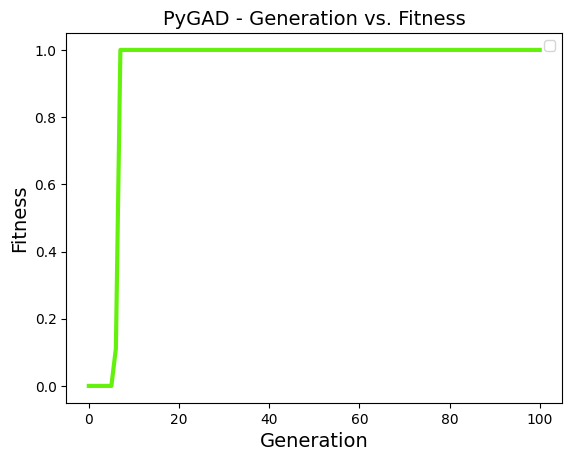

In [27]:
show_result(multibinary_genetic_solver, cost_calculator_factory, multibinary_converter)

Лучшее решение
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
Значение функции пригодности 1.0
Стоимость 1


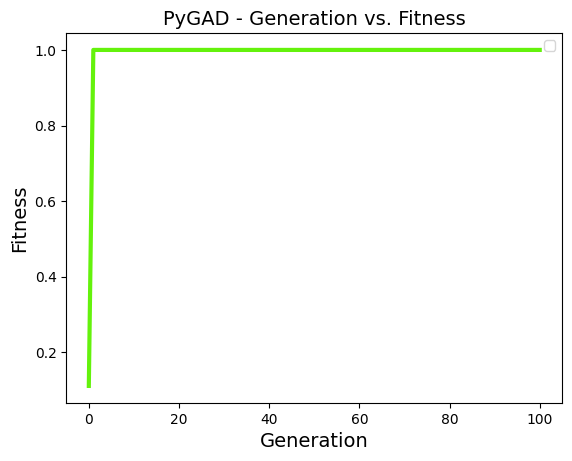

In [28]:
show_result(multidiscrete_genetic_solver, cost_calculator_factory, multidiscrete_converter)